In [5]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

In [6]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

<Figure size 648x324 with 0 Axes>

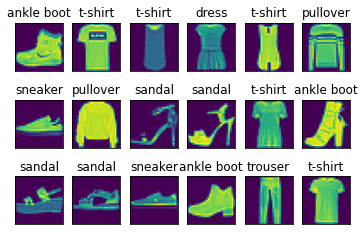

In [14]:


def get_fashion_mnist_labels(labels):
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    plt.figure(figsize=figsize)
    fig, axes =  plt.subplots(num_rows, num_cols)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 3, 6, titles=get_fashion_mnist_labels(y));


In [17]:
train_iter = data.DataLoader(mnist_train, batch_size=128, shuffle=True, num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size=128, shuffle=False, num_workers=4)

for X, Y in test_iter:
    print(f'{X.shape=} {Y.shape=}')


X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size([128])
X.shape=torch.Size([128, 1, 28, 28]) Y.shape=torch.Size

In [32]:
n_inputs = 784
n_outputs = 10

weights = torch.normal(0,0.01, size=(n_inputs, n_outputs), requires_grad=True)
biases = torch.zeros(n_outputs, requires_grad=True)


def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(1, keepdim=True)

def net(X):
    X_flat = X.reshape((-1, n_inputs))
    # print(f'{X_flat.shape=} {weights.shape=}')
    y_hat = torch.matmul(X_flat, weights) + biases
    return softmax(y_hat)

# Test model
X,_ = next(iter(test_iter))
y_hat = net(X)

y_hat, y_hat.sum(1)

(tensor([[0.1038, 0.0832, 0.1057,  ..., 0.1196, 0.0982, 0.0905],
         [0.0997, 0.0681, 0.1133,  ..., 0.0975, 0.0996, 0.0869],
         [0.0927, 0.0812, 0.0821,  ..., 0.1043, 0.1163, 0.1044],
         ...,
         [0.0980, 0.0758, 0.1019,  ..., 0.1053, 0.1113, 0.1128],
         [0.1074, 0.0767, 0.0964,  ..., 0.1118, 0.1190, 0.0958],
         [0.0969, 0.0770, 0.1011,  ..., 0.1160, 0.1065, 0.0980]],
        grad_fn=<DivBackward0>),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0

In [ ]:
def crossentropy(yt, yp):
    # return -torch.log()
    return yp[:,yt]